HW4

Arbaaz Shakir (got help for Part 1 from Ashis Gosh and Part 2 from Eric Yehl)

Part 1

1)

Entropy of outcome Y = 1

$H(Y) = 1$

HasJob

When HasJob = 0
w = 3/8  
Y = 0 w/ P = 2/3   
$\frac{2}{3}log_2(\frac{3}{2}) = .389975$  

Y = 1 w/ P = 1/3  
$\frac{1}{3}log_2({3}) = .528321$
$.389957 + .528321 = .918$

When HasJob = 1
w = 5/8  
Y = 0 w/ P = 3/5  
$\frac{3}{5}log_2(\frac{5}{3}) = .442179$   

Y = 1 w/ P = 2/5  
$\frac{2}{5}log_2(\frac{5}{2}) = .52877$ 
$.442179 + .52877 = .971$

Info Gained for HasJob: $H(Y|X) = .918(\frac{3}{8}) + .971(\frac{5}{5}) = .95$

Info Gained: $H(Y) - H(Y|X) = 1 - .95 = 0.05$

HasFamily

When HasFamily = 0

w = 1/2  
Y = 0 w/ P = 1/4   
$\frac{1}{4}log_2(4) = .5$  

Y = 1 w/ P = 3/4  
$\frac{3}{4}log_2(\frac{4}{3}) = .31128$
$.5 + .311 = .81$

When HasFamily = 1

w = 1/2  
Y = 0 w/ P = 3/4  
$\frac{3}{4}log_2(\frac{4}{3}) = .81$   

Y = 1 w/ P = 1/4  
$\frac{1}{4}log_2({4}) = .5$ 

$.311 + .5 = .81$

Info Gained for HasFamily: $H(Y|X) = .81(\frac{1}{2}) + .81(\frac{1}{2}) = .81$  
Info Gained: $H(Y) - H(Y|X) = 1 - .81 = 0.19$

IsAbove30Years

When IsAbove30Years = 0

w = 1/4  
Y = 0 w/ P = 1/2   
$\frac{1}{2}log_2(2) = .5$  

Y = 1 w/ P = 1/2  
$\frac{1}{2}log_2(2) = .5$

$.5 + .5 = 1$

When IsAbove30Years = 1

w = 3/4  
Y = 0 w/ P = 1/2   
$\frac{1}{2}log_2(2) = .5$  

Y = 1 w/ P = 1/2  
$\frac{1}{2}log_2(2) = .5$

$.5 + .5 = 1$

Info Gained for IsAbove30Years: $H(Y|X) = 1(\frac{1}{4}) + .1(\frac{3}{4}) = 1$  
Info Gained: $H(Y) - H(Y|X) = 1 - 1 = 0$

$\therefore$ HasFamily is gives the most information and is the most useful for the first split

2)

In [30]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

pd.set_option('display.max_columns', 100)

In [31]:
# visualization
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [32]:
# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from datetime import datetime
import os
import pathlib
from pathlib import Path
from __future__ import division, print_function,unicode_literals
# from graph_vis import show_graph as sg

In [33]:
# Remove warnings
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division, absolute_import #make compatible with Python 2 and Python 3

In [39]:
import bs4 as bs
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [57]:
import pandas as pd       
train = pd.read_csv("prideNprejudice.csv", header=0, delimiter="\t", quoting=0)

In [58]:
train.shape

(5370, 1)

In [59]:
words = []
for i in range(train.shape[0]):
    sentences3 = train['sentences'][i]

    sentences3 = re.sub('[^a-zA-Z]',' ',sentences3)

    words.append(sentences3.lower().split())

In [60]:
model = Word2Vec(words, size=100, window=5, min_count=5, workers=4, hs=1, negative=0)

In [61]:
vocabTmp = list(model.wv.vocab)
print('Vocab length:', len(vocabTmp))

Vocab length: 1941


In [62]:
model.corpus_count

5370

In [63]:
X = model[vocabTmp]

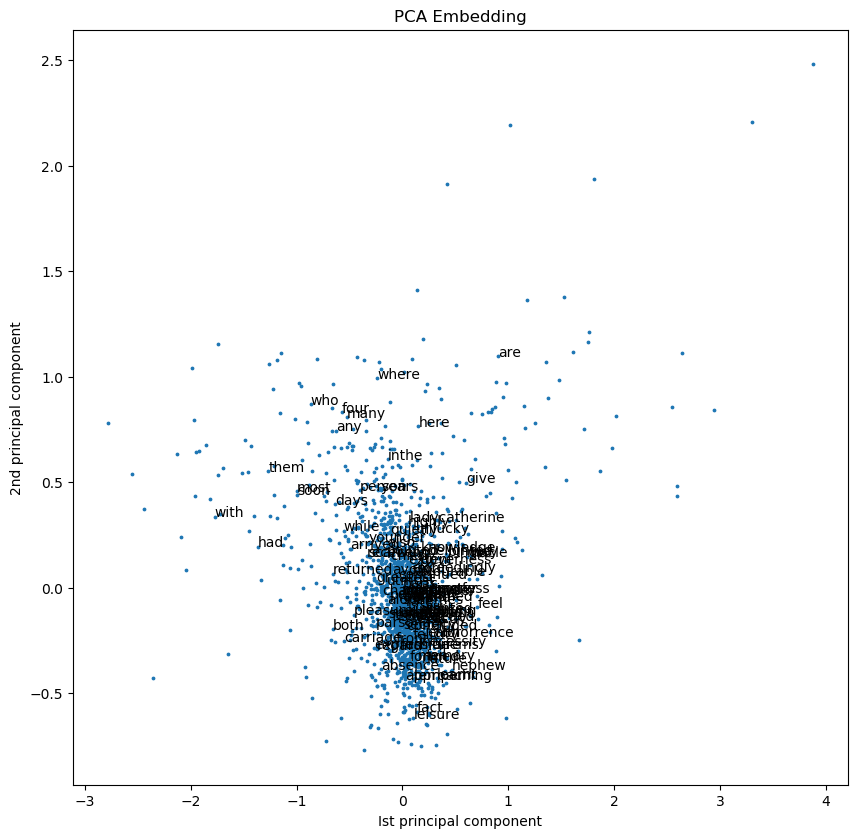

In [64]:
from sklearn import decomposition
# get two principle components of the feature space
pca = decomposition.PCA(n_components=2).fit_transform(X)

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocabTmp)],axis=1)
df.columns = ['x', 'y', 'word']


plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')


plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:100]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
    
plt.title("PCA Embedding")
plt.show()

In [65]:
print('The most similar word to "england" is', model.wv.most_similar('england')[0][0], 'with a similarity of', model.wv.most_similar('england')[0][1])
print('Similarity between elizabeth and man', model.similarity('elizabeth','man'))
print('Similarity between elizabeth and girl', model.similarity('elizabeth','girl'))
print('Between the words "england", "queen" and "king", the word', model.wv.doesnt_match('england king queen'.split()), 'does not match')

The most similar word to "england" is bye with a similarity of 0.810457706451416
Similarity between elizabeth and man -0.018027484838473818
Similarity between elizabeth and girl 0.4327758314448439
Between the words "england", "queen" and "king", the word king does not match


3)

In [3]:
import sqlite3
import pandas as pd

In [4]:
connection = sqlite3.connect('parents.db')
cursor = connection.cursor()

3.1 Simple Selects

In [5]:
cursor.execute('DROP TABLE IF EXISTS parents')

In [6]:
buildParents = '''
CREATE TABLE parents AS
  SELECT "abraham" AS parent, "barack" AS child UNION
  SELECT "abraham",           "clinton"         UNION
  SELECT "delano",            "herbert"         UNION
  SELECT "fillmore",          "abraham"         UNION
  SELECT "fillmore",          "delano"          UNION
  SELECT "fillmore",          "grover"          UNION
  SELECT "eisenhower",        "fillmore";
'''

cursor.execute(buildParents)

In [7]:
connection.commit()

In [8]:
pd.read_sql_query('SELECT * FROM parents', con = connection)

,parent,child
0,abraham,barack
1,abraham,clinton
2,delano,herbert
3,eisenhower,fillmore
4,fillmore,abraham
5,fillmore,delano
6,fillmore,grover


2) Select child and parent, where abraham is the parent

In [9]:
pd.read_sql_query("select child, parent from parents where parent = 'abraham'", con = connection)

,child,parent
0,barack,abraham
1,clinton,abraham


3) Select all children that have an 'e' in their name (hint: use LIKE and '%e%')

In [9]:
pd.read_sql_query('''select child from parents 
WHERE child like '%e%';''', con = connection)

,child
0,herbert
1,fillmore
2,delano
3,grover


4) Select all unique parents (use SELECT DISTINCT) and order them by name, descending order (i.e. fillmore first)

In [10]:
pd.read_sql_query('''select distinct parent from parents
    order by parent desc;''', connection)

,parent
0,fillmore
1,eisenhower
2,delano
3,abraham


5) Select all dogs that are siblings (one-to-one relations). Only show a sibling pair once. To do this you need to select two times from the parents table

In [11]:
pd.read_sql_query(''' select a.child as child1, b.child as child2 
    from parents as a, parents as b 
    where a.parent = b.parent 
     and a.child < b.child ''',
                 connection)

,child1,child2
0,barack,clinton
1,abraham,delano
2,abraham,grover
3,delano,grover


Joins

In [12]:
cursor.execute('drop table if exists dogs')

In [13]:
dogsTable = '''
CREATE TABLE dogs AS
 SELECT "abraham" AS name, "long" AS fur UNION
 SELECT "barack", "short" UNION
 SELECT "clinton", "long" UNION
 SELECT "delano", "long" UNION
 SELECT "eisenhower", "short" UNION
 SELECT "fillmore", "curly" UNION
 SELECT "grover", "short" UNION
 SELECT "herbert", "curly";
'''
cursor.execute(dogsTable)
connection.commit()

1) Count the number of short haired dogs

In [14]:
pd.read_sql_query(''' select count(*) as numShortHairDogs
    from dogs
    where fur = "short";
''', connection)

,numShortHairDogs
0,3


2) Join tables parents and dogs and SELECT the parents of curly dogs

In [15]:
pd.read_sql_query('''
SELECT parent
    FROM parents JOIN dogs 
    on child = name
    where fur = 'curly'
;''', connection)

,parent
0,eisenhower
1,delano


3) Join tables parents and dogs, and SELECT the parents and children that have the same fur type. Only show them once

In [16]:
pd.read_sql_query('''
with a as (Select child, parent, fur
from parents join dogs
on child = name),

b as (SElect name, parent, fur
from parents join dogs
on child = name) 

SELect a.child, b.name as parent
from a, b
where a.parent = b.name
and a.fur = b.fur;

''', connection)

,a.child,parent
0,clinton,abraham


Aggregate functions, numerical logic, and grouping

In [17]:
buildAnimals = '''create table animals as
 select "dog" as kind, 4 as legs, 20 as weight union
 select "cat" , 4 , 10 union
 select "ferret" , 4 , 10 union
 select "parrot" , 2 , 6 union
 select "penguin" , 2 , 10 union
select "t-rex" , 2 , 12000;'''

cursor.execute(buildAnimals)

In [18]:
connection.commit()

1) Select the animal with the minimum weight. Display kind and min_weight.

In [19]:
pd.read_sql_query('''
select kind, min(weight) as min_weight
from animals;''', connection)

,kind,min_weight
0,parrot,6


2) Use the aggregate function AVG to display a table with the average number of legs and the average weight.

In [20]:
pd.read_sql_query('''
select avg(legs), avg(weight)
from animals;''', connection)

,avg(legs),avg(weight)
0,3.0,2009.333333


3) Select the animal kind(s) that have more than two legs, but weighs less than 20. Display kind, weight, legs.

In [21]:
pd.read_sql_query('''
select kind, weight, legs
from animals
where legs>2 and weight<20;''', connection)

,kind,weight,legs
0,cat,10,4
1,ferret,10,4


4) Select the average weight for all the animals with 2 legs and the animals with 4 legs (by using GROUP BY).

In [22]:
pd.read_sql_query('''
select avg(weight), legs
from animals
group by legs;''', connection)

,avg(weight),legs
0,4005.333333,2
1,13.333333,4
